#### CNN Filters
- CNN filters (kernels) are the main "feature extractor". Each filter is just a small matrix of weight that gets convolved with the input image
- After convolution, the output is a feature map, which is then passed through a non-linear activation function (like ReLU, sigmoid or tanh)
- The filter weights determine what kind of pattern is detected (edges, corners, textures, etc).
- The activation determines how strongly that pattern is expressed, by introducing non-linearity. 
- Without the activation function, stacking many filters would still collapse into just a single linear transformation (no matter how deep)

##### Summary
- Filters = What patterns to look for
- Activations = How to express those patterns non-linearly, so more complex structures can emerge.

#### Convolution process
- Assuming we have a small image (6 x 6 pixels). Each pixel is just a number (intensity value).

##### 1. Convloution with filters (Kernels)
- Using 8 filters (say 3 x 3 each).
- Each filter is like a stencil that strides across the image and multiplies its weight with the pixel values.
- Example:
    - Filter A might highlight vertical edges.
    - Filter B might highlight horizontal edges.
    - Filter C might highlight diagonal lines.
- After this operation, we get `8 different feature maps` (one per filter).

##### 2. Activation Function (Non-linearity)
- Each feature map is passed through an activation function  (like ReLU).
- Why? Without it, the network is just a linear system. With it, the network can stack layers to learn complex patterns.
- Example:
    - A vertical edge detected strongly -> positive values (kept by ReLU).
    - Weak detection -> values close to zero.
    - Negative values -> suppressed (set to zero by ReLU).
- This step makes the edge/shapes stand out.

##### 3. Pooling (Downsampling)
- Let's use max pooling.
- It takes a small patch (like 2 x 2) and keeps only the max value.
- Purpose:
    - Reduces spatial size (so the network is efficient).
    - Keeps the strongest features (most prominent edges/shapes).
    - Adds a bit of invariance (feature doesn't need to be in the exact same pixel location).

##### 4. Deeper Layers
- As you stack moe conv + activation + pooling layers:
    - Early layers -> detect edges and textures
    - Middle layers -> detect shapes, cornes, curves.
    - Deep layers -> detect high-level structures (eyes, wheels, flow vortices, etc.) depending on your data

##### Summary
- Convolution (filters) = extracts raw features.
- Activation function = adds non-linearity, keeps strong features alive.
- Pooling = compresses, keeps important infomation, discards noise.
- Deeper layers = combine simple features into complex patterns.

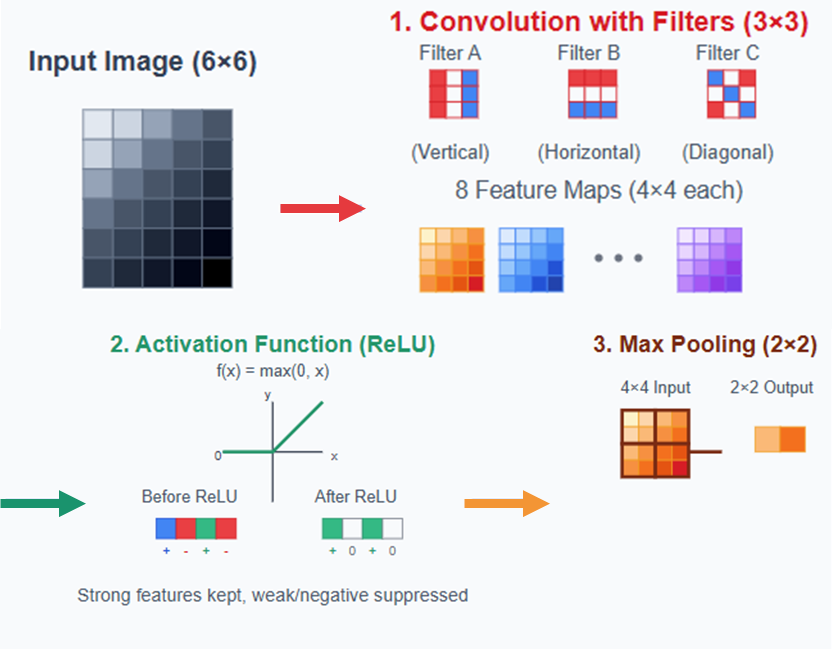

#### How are fiters assigned?
- At the start of training, filters (kernels) in CNNs are not hand-crafted rather they are initialized with random values.
- The most commongs ways to do this are:
    1. Random initialization (basic way)
       - Just small random numbers (e.g., Guassiona or uniform distribution).
       - Works, but can cause problems with vanishing/exploding gradients in deep nets.

    2. He initialization (most common for ReLU activations)
       - Proposed by Kaiming He et al.
       - Weights (W) are sampled from a distribution with variance(Var) scaled as:
             $$
               Var(W) = \frac{2}{n_{\text{in}}}
             $$ 
       - where $n_{\text{in}}$ = number of input connections to a neuron (or kernel).
       - keeps the variance of activations stable through layers.

    3. Xavier/Glorot initialization (common with sigmoid/tanh)
       - Scales variance as:
             $$
               Var(W) = \frac{2}{n_{\text{in}} + n_{\text{out}}}
             $$ 
- After initialization, the filters are updated by backpropagation so that they can learn to detect edges, textures, etc.

Filter weights shape:  torch.Size([8, 3, 3, 3])
First filter weights:
 tensor([[[-0.0466, -0.0984,  0.1372],
         [ 0.0399,  0.1483,  0.1319],
         [-0.1880, -0.1753,  0.0128]],

        [[-0.1829, -0.0058,  0.1248],
         [-0.0180,  0.1654,  0.0758],
         [-0.1411,  0.0707, -0.0880]],

        [[ 0.1417,  0.0390, -0.0185],
         [ 0.1902, -0.1133, -0.1361],
         [-0.0852, -0.1643,  0.0187]]], grad_fn=<SelectBackward0>)
Bias shape:  torch.Size([8])
Bias values:
 Parameter containing:
tensor([ 0.0214, -0.1721, -0.1260,  0.1003, -0.1329,  0.1586, -0.1839, -0.1301],
       requires_grad=True)


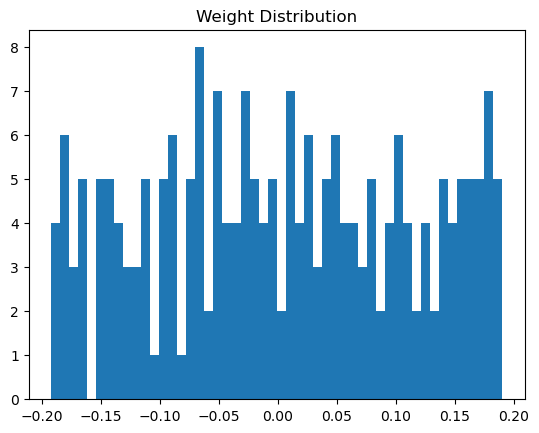

In [ ]:
# Convolution filters initialization

import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# Pytorch uses Kaiming (He) initializaton by default
conv = nn.Conv2d(
    in_channels=3,   # RGB input
    out_channels=8,  # filters
    kernel_size=3    # 3x3 filters
)

print("Filter weights shape: ", conv.weight.shape) # [out_channels, in_channels, kernel_height, kernel_width]
print("First filter weights:\n", conv.weight[0])

print("Bias shape: ", conv.bias.shape)
print("Bias values:\n", conv.bias)

weights = conv.weight.data.view(-1).cpu().numpy()

plt.hist(weights, bins=50)
plt.title("Weight Distribution")
plt.show()

C:\Users\johna\AppData\Local\Temp\ipykernel_16376\2882206971.py:2: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  nn.init.xavier_uniform(conv.weight)


Filter weights shape:  torch.Size([8, 3, 3, 3])
First filter weights:
 tensor([[[-0.0895, -0.0757, -0.0314],
         [-0.1401,  0.0568, -0.2425],
         [ 0.0128,  0.0610, -0.1477]],

        [[ 0.1980, -0.2438,  0.0877],
         [-0.1141, -0.1347, -0.1457],
         [-0.2430, -0.0937,  0.0725]],

        [[-0.0314, -0.2033, -0.1637],
         [-0.0065,  0.1253,  0.1663],
         [-0.0237,  0.1943, -0.0447]]], grad_fn=<SelectBackward0>)
Bias shape:  torch.Size([8])
Bias values:
 Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


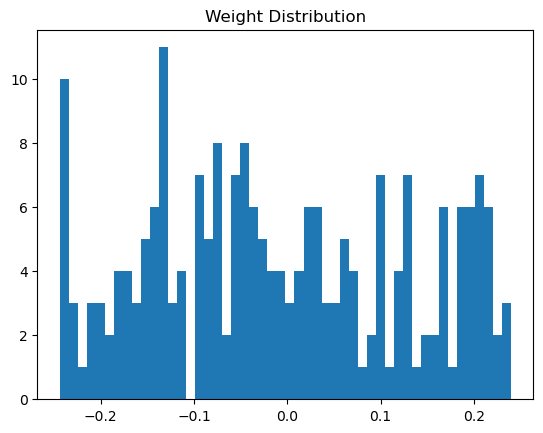

In [4]:
# Initialization to Xavier
nn.init.xavier_uniform(conv.weight)
nn.init.zeros_(conv.bias)

print("Filter weights shape: ", conv.weight.shape) # [out_channels, in_channels, kernel_height, kernel_width]
print("First filter weights:\n", conv.weight[0])

print("Bias shape: ", conv.bias.shape)
print("Bias values:\n", conv.bias)

weights = conv.weight.data.view(-1).cpu().numpy()

plt.hist(weights, bins=50)
plt.title("Weight Distribution")
plt.show()